## **1. Bar Chart stating consumption across India**

In [2]:
import os

# Set the working directory
os.chdir("/Users/sarathsabu/Desktop/scma/A5")

# Verify the working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/sarathsabu/Desktop/scma/A5


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "NSSO68.csv"  
data = pd.read_csv(file_path,low_memory=False)

# Inspect the first few rows of the dataset to understand its structure
print(data.head())

   slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  Sample  \
0     1  4.10E+31             1       41000     68               10       1   
1     2  4.10E+31             1       41000     68               10       1   
2     3  4.10E+31             1       41000     68               10       1   
3     4  4.10E+31             1       41000     68               10       1   
4     5  4.10E+31             1       41000     68               10       1   

   Sector  state  State_Region  ...  pickle_v  sauce_jam_v  Othrprocessed_v  \
0       2     24           242  ...       0.0          0.0              0.0   
1       2     24           242  ...       0.0          0.0              0.0   
2       2     24           242  ...       0.0          0.0              0.0   
3       2     24           242  ...       0.0          0.0              0.0   
4       2     24           242  ...       0.0          0.0              0.0   

   Beveragestotal_v  foodtotal_v  foodtotal_q  sta

In [4]:
# Subset the data with specified columns and filter based on state_1
subset_data = data[['state', 'District', 'MPCE_URP', 'MPCE_MRP', 'state_1']]
filtered_data = subset_data[subset_data['state_1'] == 'MP']

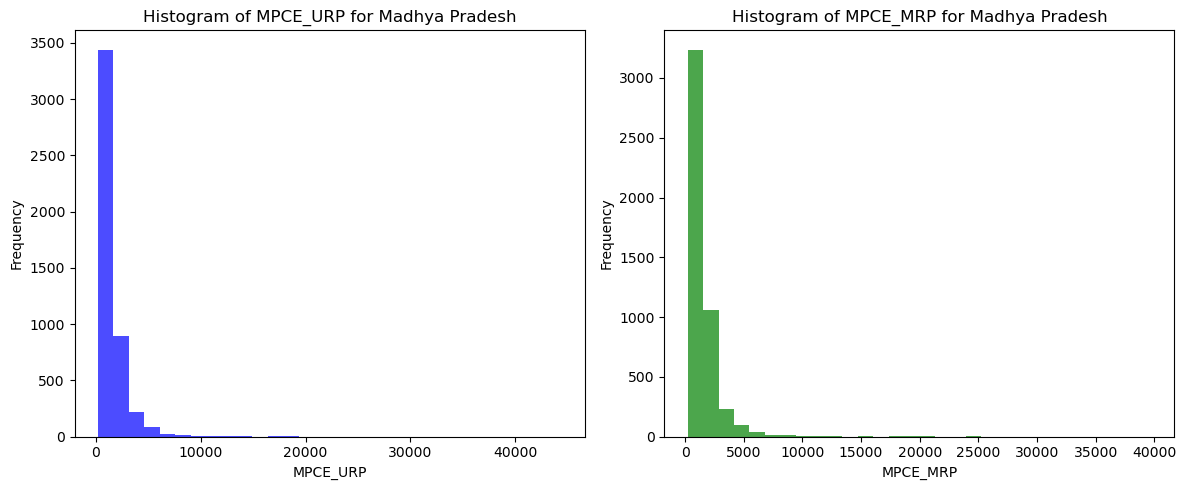

In [5]:
import matplotlib.pyplot as plt

# Plot histograms for MPCE_URP and MPCE_MRP
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(filtered_data['MPCE_URP'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of MPCE_URP for Madhya Pradesh')
plt.xlabel('MPCE_URP')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(filtered_data['MPCE_MRP'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of MPCE_MRP for Madhya Pradesh')
plt.xlabel('MPCE_MRP')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

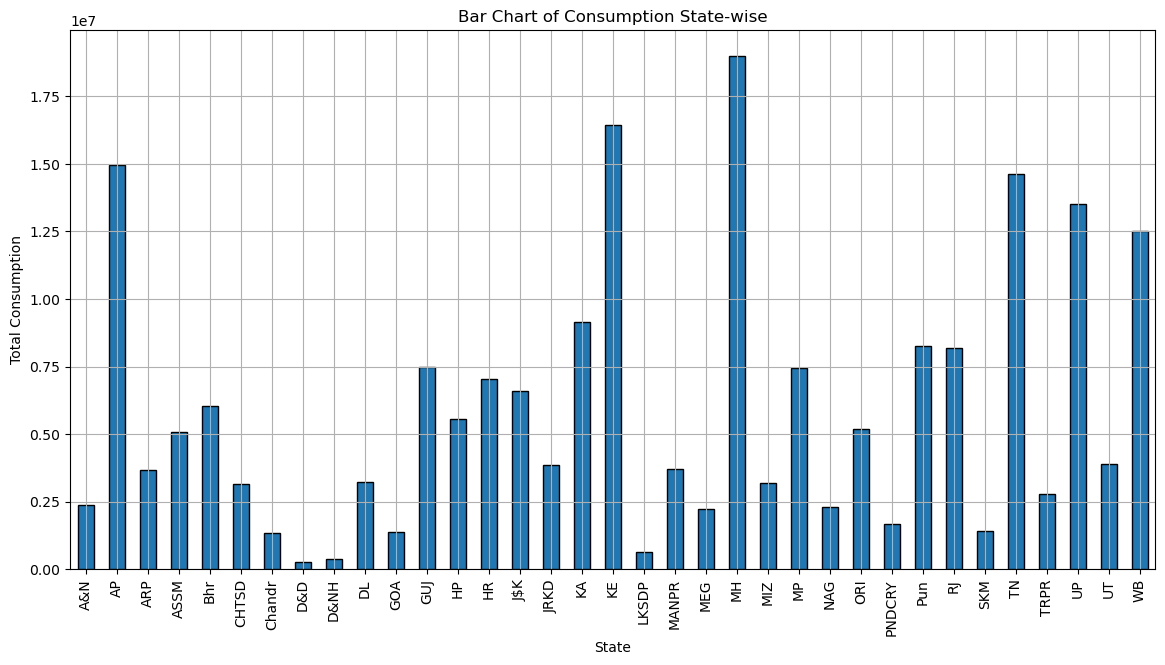

In [6]:
# Assuming the relevant columns are named 'state_1' for state names and 'MPCE_URP' for consumption
state_column = 'state_1'  # Replace with the actual column name for states
consumption_column = 'MPCE_URP'  # Replace with the actual column name for consumption

# Group the data by state and sum the consumption
state_consumption = data.groupby('state_1')['MPCE_URP'].sum()

# Plot the bar chart
plt.figure(figsize=(14, 7))
state_consumption.plot(kind='bar', edgecolor='black')
plt.title('Bar Chart of Consumption State-wise')
plt.xlabel('State')
plt.ylabel('Total Consumption')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## **2. Consumption on the state map of KA**

In [8]:
#Import GeoPandas library 
import geopandas as gpd

# Load the shapefile
gdf_districts = gpd.read_file("District.shp")

gdf_districts.head()

,KGISDistri,LGD_Distri,KGISDist_1,BhuCodeDis,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,01,527,Belagavi,01,None,0000/00/00,SURESHBV1,2022-11-24,1.339772e+10,1.141488e+06,"MULTIPOLYGON (((537523.31 1865366.861, 537555...."
1,02,524,Bagalkot,02,None,0000/00/00,SURESHBV1,2022-09-08,6.561826e+09,6.682456e+05,"POLYGON ((581917.898 1811433.959, 581946.875 1..."
2,03,530,Vijayapura,03,None,0000/00/00,SURESHBV1,2022-11-24,1.050271e+10,7.032618e+05,"POLYGON ((537523.31 1865366.861, 537516.168 18..."
3,04,538,Kalburgi,04,None,0000/00/00,SURESHBV1,2022-11-09,1.097395e+10,9.181459e+05,"MULTIPOLYGON (((680992.661 1951255.947, 681227..."
4,05,529,Bidar,05,None,0000/00/00,SURESHBV1,2022-11-16,5.454415e+09,5.733925e+05,"MULTIPOLYGON (((766506.612 1970249.909, 766481..."


<Axes: >

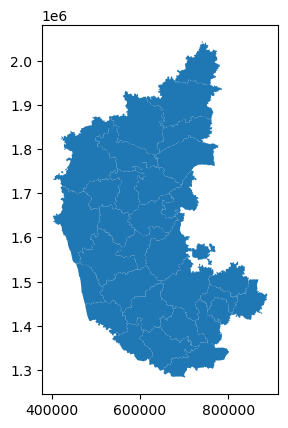

In [9]:
#plot the map
gdf_districts.plot()

In [10]:
import pandas as pd

# Load the NSSO68.csv file
nsso_data = pd.read_csv('NSSO68.csv',low_memory=False)

# Subset the data with specified columns and filter based on state_1
subset_data = nsso_data[['state', 'District', 'MPCE_URP', 'MPCE_MRP', 'state_1']]
filtered_data = subset_data[subset_data['state_1'] == 'KA']

# Load the district-codes.xlsx file
district_codes = pd.read_excel('district-codes.xlsx')

# Filter district codes for Karnataka
karnataka_districts = district_codes[district_codes['state name'] == 'Karnataka']

# Create a mapping from district codes to district names
district_mapping = dict(zip(karnataka_districts['dc'], karnataka_districts['district name']))

# Replace district codes in the filtered NSSO data with district names
filtered_data['District'] = filtered_data['District'].map(district_mapping)

# Sum all values district-wise
district_wise_sum = filtered_data.groupby('District').sum().reset_index()

# Exclude 'state_1' from the sum result
district_wise_sum = district_wise_sum[['District', 'MPCE_URP', 'MPCE_MRP']]

# Display the resulting DataFrame
district_wise_sum

/var/folders/11/5qgt24mj3135k8l3q8bt4chm0000gn/T/ipykernel_95513/4093436668.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['District'] = filtered_data['District'].map(district_mapping)


,District,MPCE_URP,MPCE_MRP
0,Bagalkot *,174637.12,188630.85
1,Bangalore,1971811.41,2097996.99
2,Bangalore Rural,147689.44,167381.05
3,Belgaum,359775.85,386126.91
4,Bellary,268798.33,307397.14
5,Bidar,132880.05,126224.45
6,Bijapur,216815.91,226354.48
7,Chamarajanagar *,223580.93,203602.53
8,Chikkaballapura,197961.96,191656.92
9,Chikmagalur,119842.93,137185.02


In [11]:
df = district_wise_sum

In [12]:
# Merge shapefile with varibale related to Districts
#KGISDist_1 is our Distrcit Name in gdf_districts dataframe
#District is our Distrcit Name in df dataframe
gdf_merged = gdf_districts.merge(df, left_on='KGISDist_1', right_on='District', how='left')

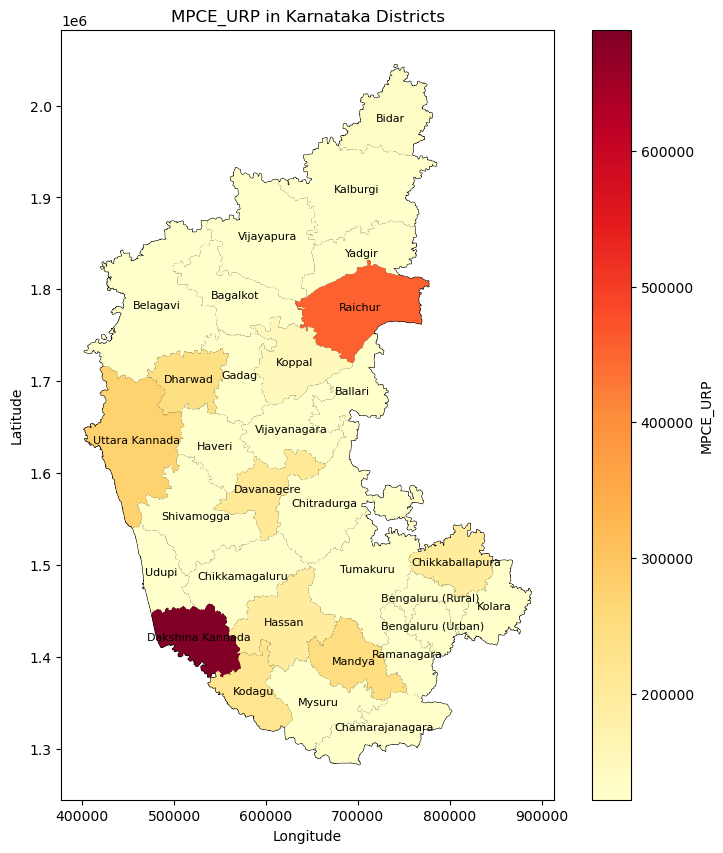

In [13]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# Define color scale
cmap = plt.colormaps['YlOrRd']  # Red to green colormap (reversed)
cmap.set_bad('white')  # Set NaN values to white
normalize = colors.Normalize(vmin=gdf_merged['MPCE_URP'].min(), vmax=gdf_merged['MPCE_URP'].max())

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_districts.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8)  # Plot the district outlines

# Fill districts with color based on population values
infes_values = gdf_merged['MPCE_URP'].fillna(np.nanmin(gdf_merged['MPCE_URP']) - 1)  # Replace NaN values with a value lower than min
gdf_districts.plot(ax=ax, column=infes_values, cmap=cmap, linewidth=0, legend=False)

# Add district labels
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['KGISDist_1']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Set plot title and axis labels
ax.set_title('MPCE_URP in Karnataka Districts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create and add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('MPCE_URP')

# Show the plot
plt.show()

In [27]:
# Subset the data with specified columns and filter based on state_1
subset_data = data[['state', 'District', 'MPCE_URP', 'MPCE_MRP', 'state_1']]
filtered_data = subset_data[subset_data['state_1'] == 'MP']
# Save the filtered data to a CSV file
filtered_data.to_csv("MP.csv", index=False)

print("Filtered data saved to ‘MP.csv'")

Filtered data saved to ‘MP.csv'
